# **Capstone Project Bengkel Koding - Muhammad Ikhsan Asagaf - A11.2022.14255**

# **Import Dataset dari Kaggle**



In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path,
)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.


# **Importing Modules**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

# **Data Understanding**

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Missing value identification

In [ ]:
missing_val = (df.isnull().sum() / len(df)) * 100
print(missing_val)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


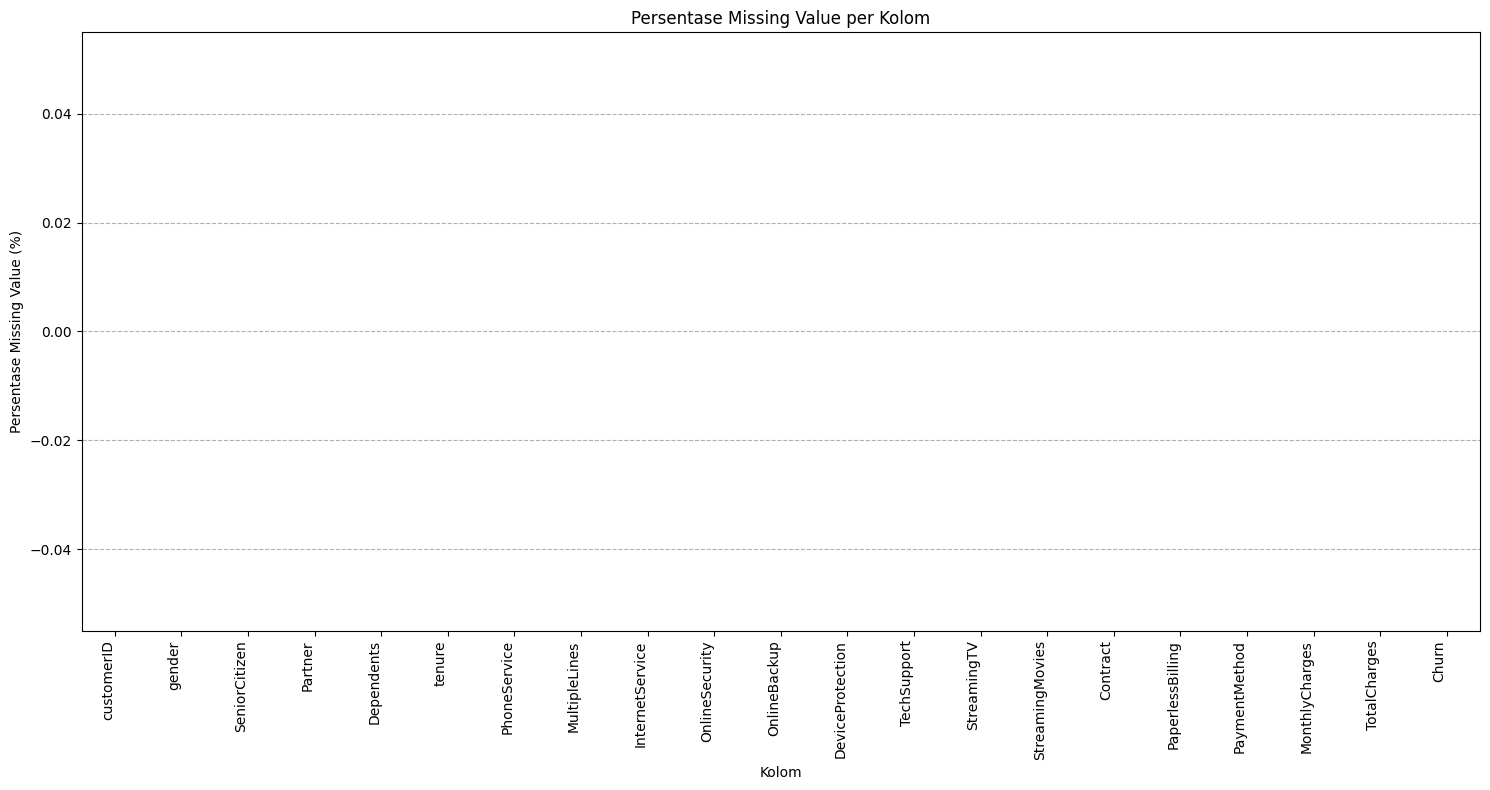

In [ ]:
# Mengurutkan missing value tiap kolom
missing_val_to_plot = missing_val.sort_values(ascending=False)

plt.figure(figsize=(15, 8))
missing_val_to_plot.plot(kind='bar', color='mediumblue')
plt.title('Persentase Missing Value per Kolom')
plt.xlabel('Kolom')
plt.ylabel('Persentase Missing Value (%)')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Distribusi variabel target (*Churn)*

Churn
No     5174
Yes    1869
Name: count, dtype: int64


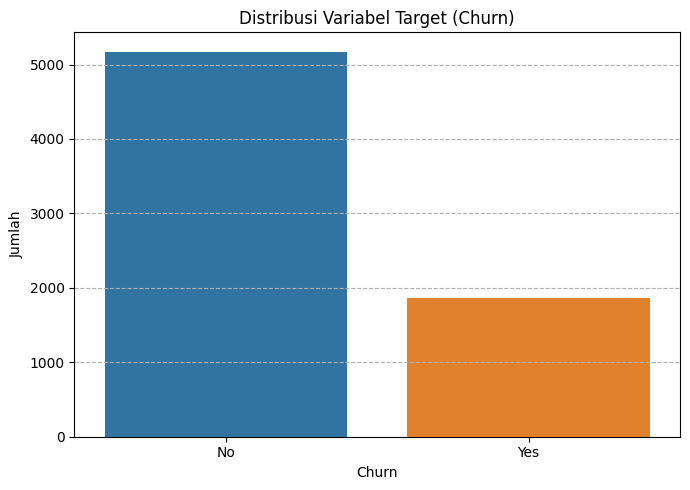

In [ ]:
# Hitung distribusi variabel target
target_distribution = df['Churn'].value_counts()

# Jumlah data
print(target_distribution)

# Visualisasikan hasil distribusi
plt.figure(figsize=(7, 5))
sns.barplot(x=target_distribution.index, y=target_distribution.values, hue=target_distribution.index, legend=False)
plt.title('Distribusi Variabel Target (Churn)')
plt.xlabel('Churn')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


## Analisis Korelasi antar Fitur Numerik

### Distribusi Variabel Target (Churn)

Hasil analisis distribusi variabel target 'Churn' menunjukkan adanya ketidakseimbangan data:

*   **Pelanggan Tidak Churn (No):** Terdapat 5174 pelanggan.
*   **Pelanggan Churn (Yes):** Terdapat 1869 pelanggan.



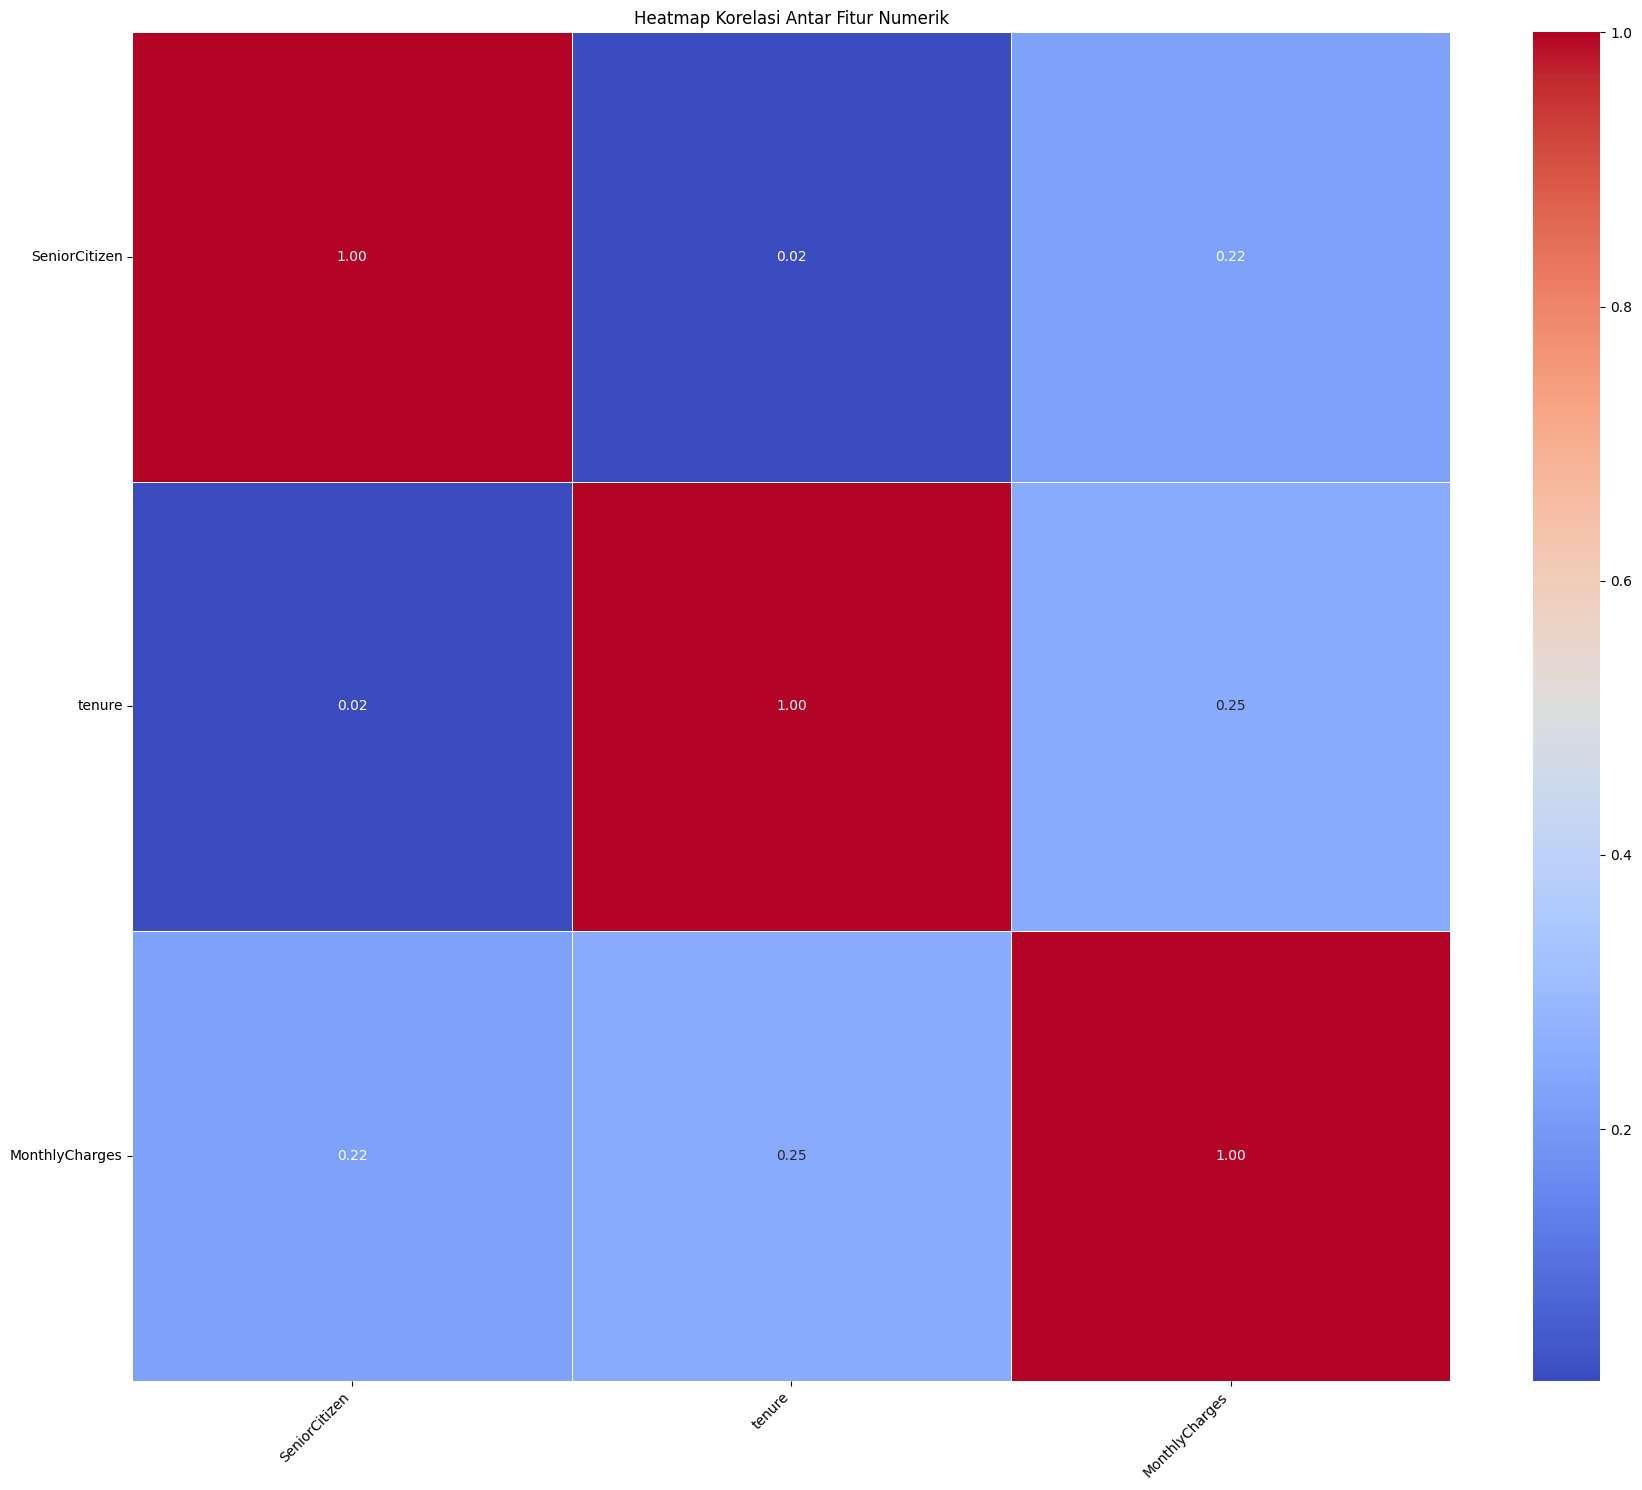

In [ ]:
# Menampilkan kolom numerikal
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Menghitung matriks korelasi
correlation_matrix = numerical_df.corr()

# Membuat heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()